# PROBLEM STATEMENT for K-NN:


## Parkinsons Data Set

The given dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with Parkinson's Disease, according to "status" column which is set to 0 for healthy and 1 for PD.  Dataset can be downloaded from below link.

https://archive.ics.uci.edu/ml/datasets/parkinsons

### Attribute Information:

Matrix column entries (attributes):   
name - ASCII subject name and recording number   
MDVP:Fo(Hz) - Average vocal fundamental frequency  
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency  
MDVP:Flo(Hz) - Minimum vocal fundamental frequency  
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency  
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude  
NHR,HNR - Two measures of ratio of noise to tonal components in the voice   
status - Health status of the subject (one) - Parkinson's, (zero) - healthy   
RPDE,D2 - Two nonlinear dynamical complexity measures   
DFA - Signal fractal scaling exponent  
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation  

In [1]:
from platform import python_version

print(python_version())

3.7.10


In [2]:
#Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
pd.set_option('display.max_columns', None)

 imported the dataset

In [3]:
data = pd.read_csv("parkinsons.csv")

In [4]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
data.shape

(195, 24)

### Q1) Handling of missing values, outliers, if any .Checking Missing 

As we see above there is no missing data is available 

In [7]:
data.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [9]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


### Q2) Identifying data and model issues if any.

### Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

k-NN performs much better if all of the data have the same scale

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
column =["status","name"]
scaler.fit(data.drop(column,axis=1))
scaled_features = scaler.transform(data.drop(column,axis=1))
scaled_features

array([[-0.82929965, -0.43616456, -0.95203729, ...,  0.48047686,
        -0.21053082,  0.86888575],
       [-0.77097169, -0.53097409, -0.05772056, ...,  1.31118546,
         0.27507712,  1.80360503],
       [-0.90947638, -0.7231683 , -0.10987483, ...,  1.01768236,
        -0.10362861,  1.40266141],
       ...,
       [ 0.49557839,  0.47010361, -0.96839309, ..., -0.81807931,
         0.78033848, -0.83241014],
       [ 1.07876114,  2.19004398, -0.95417967, ..., -0.22906571,
        -0.63700298, -0.92610456],
       [ 1.45481664,  0.69224632, -0.88348115, ..., -0.43085284,
         0.45480231, -0.64505466]])

In [11]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [12]:
df_feat = pd.DataFrame(scaled_features,columns=['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'])
df_feat.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,0.607859,1.119147,0.332985,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,1.547912,2.276504,1.159454,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,1.175643,1.726176,0.699187,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,1.340547,1.848749,0.806859,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,1.899444,2.532491,1.216839,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082


### Q4) Selection of train, test split.

Split the dataset into two sets: a training set and a test set.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,data['status'],
                                                    test_size=0.30)

### Q3) Choice of packages and distance measure used. justify your answer.

In [14]:
#Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


Manhattan Distance is the sum of absolute differences between points across all the dimensions.

In [15]:
knn = KNeighborsClassifier(n_neighbors=1,metric="manhattan")
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [16]:
print("Accuracy_score : ",accuracy_score(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy_score :  0.9322033898305084


[[12  1]
 [ 3 43]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.98      0.93      0.96        46

    accuracy                           0.93        59
   macro avg       0.89      0.93      0.91        59
weighted avg       0.94      0.93      0.93        59



Euclidean Distance –It is a measure of the true straight line distance between two points in Euclidean space.

In [17]:
knn = KNeighborsClassifier(n_neighbors=1,metric="euclidean")
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [18]:
print("Accuracy_score : ",accuracy_score(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy_score :  0.9491525423728814


[[13  0]
 [ 3 43]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.93      0.97        46

    accuracy                           0.95        59
   macro avg       0.91      0.97      0.93        59
weighted avg       0.96      0.95      0.95        59



As we see above using the Manhattan Distance giving more accuracy then Equlidean distance. Here we cosidered K=1.
But we need to find out on which K value model will give good accuracy.     
    
We need to do hyperparameter tuning  , hyperparameter in KNN are "n_neighbours" (the value of K), "metric" (distance metrics to be used, for example, manhattan or euclidean.    

As we seen above distance matrice - manhattan giving more accuracy than euclidean distance.


### Q5) Final model creation and accuracy matrix selected for the model.

## Choosing a K Value

Using distace as "manhattan" and calaculating Error rate with respect to k value.
Need to find which K value error rate is less

In [19]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i,metric="manhattan")
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Comparing Error Rate with the K Value 

Text(0, 0.5, 'Error Rate')

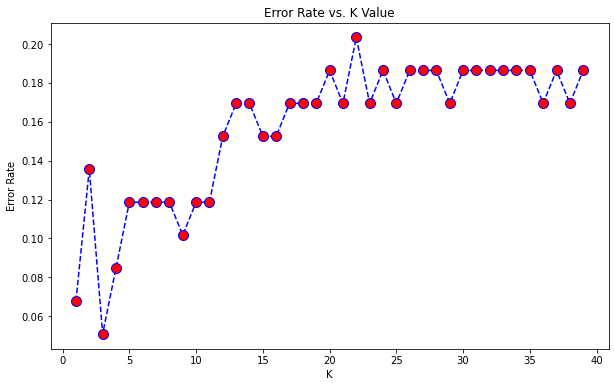

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

As we see above the minimum error rate at K=3. 

In [21]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1,metric="manhattan")

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print("Accuracy_score : ",accuracy_score(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


Accuracy_score :  0.9322033898305084


[[12  1]
 [ 3 43]]


              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.98      0.93      0.96        46

    accuracy                           0.93        59
   macro avg       0.89      0.93      0.91        59
weighted avg       0.94      0.93      0.93        59



In [22]:
# NOW WITH K=3
knn = KNeighborsClassifier(n_neighbors=3,metric="manhattan")

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print("Accuracy_score : ",accuracy_score(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


Accuracy_score :  0.9491525423728814


[[12  1]
 [ 2 44]]


              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.98      0.96      0.97        46

    accuracy                           0.95        59
   macro avg       0.92      0.94      0.93        59
weighted avg       0.95      0.95      0.95        59



as we see above the using :   
K=1 and distance metric="manhattan" , getting accuracy = 0.9322033898305084  
k=3 and distance metric="manhattan" , getting accuracy = 0.9491525423728814     

so ours model giving very good accuracy when K value is 3 and distace matric is "Mahattan"


### Q6)Future scope of the work.  

KNN classifier is highly sensitive to the choice of ‘k’ or n_neighbors.
This algorithm is used to solve the classification model problems.  
This algorithm basically creates an imaginary boundary to classify the data. When new data points come in, the algorithm will try to predict that to the nearest of the boundary line.   
Therefore, larger k value means smother curves of separation resulting in less complex models. Whereas, smaller k value tends to overfit the data and resulting in complex models.     
It’s very important to have the right k-value when analyzing the dataset to avoid overfitting and underfitting of the dataset.